# source link : https://datamillnorth.org/dataset/customer-meter-data

# local area study dataset link :
# https://datamillnorth.org/dataset/yorkshire-water-daily-customer-meter-data--local-area-
# https://datamillnorth.org/download/yorkshire-water-daily-customer-meter-data--local-area-/fb01ce66-423a-4111-9065-d989bdf0b3ce/Daily%20m3%201315.csv

In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = "https://datamillnorth.org/download/customer-meter-data/b9f2cc02-3fe2-42ae-8470-b2e5d96af712/201415%20YW%20Customer%20Meter%20Data.csv"
df = pd.read_csv(url)


GROSS_COMSUMPTION - (READING_END_READING)-(READING_START_READING).  One unit = 1m3 (1000 litres)

In [ ]:
df.head()

In [ ]:
df.info()

# some cleaning

In [2]:
df.dropna()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
227,Barnoldswick,BB18,House RV 150-399,89828,11/05/2014 00:00,22/08/2014 00:00,6740.0,6770.0,30,0.288,Normal reading,,61-70,18.0
228,Barnoldswick,BB18,House RV 150-399,89828,20/11/2014 00:00,12/02/2015 00:00,6799.0,6838.0,39,0.459,Normal reading,,61-70,18.0
231,Barnoldswick,BB18,House RV 150-399,89836,11/05/2014 00:00,22/08/2014 00:00,6580.0,6591.0,11,0.106,Normal reading,,61-70,33.0
232,Barnoldswick,BB18,House RV 150-399,89836,20/11/2014 00:00,13/02/2015 00:00,6602.0,6620.0,18,0.209,Normal reading,,61-70,33.0
233,Barnoldswick,BB18,House RV 150-399,89850,11/05/2014 00:00,21/08/2014 00:00,77.0,99.0,22,0.214,Actual Automated Meter Reading,,81+,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485491,Selby,YO8,House RV 76-99,1268406,30/03/2015 00:00,30/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,41-50,0.0
2485494,Selby,YO8,House RV 100-124,1268504,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,51-60,0.0
2485495,Selby,YO8,House RV 125-149,1268725,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,31-40,0.0
2485499,Selby,YO8,All new Domestic Properties,1270351,27/03/2015 00:00,27/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,16-30,0.0


In [3]:
df = df.drop_duplicates(keep='first')
df

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485506,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,29/01/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485507,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,10/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485508,NaN,YO89,All new Domestic Properties,1260079,10/03/2015 00:00,25/03/2015 00:00,0.0,1.0,1,0.063,Actual Automated Meter Reading,,NaN,0.0
2485509,NaN,YO9,All new Domestic Properties,388182,24/01/2014 00:00,10/04/2014 00:00,582.0,609.0,27,0.351,Actual Automated Meter Reading,,31-40,7.0


# deeper data understanding

In [ ]:
df['READING_SOURCE'].unique()

In [4]:
df=df.dropna(subset=["POSTAL_TOWN"])
df['POSTAL_TOWN'].unique()

array(['Barnoldswick', 'Bradford', 'Bingley', 'Shipley', 'Cleckheaton',
       'Keighley', 'Skipton', 'Settle', 'Richmond', 'Darlington',
       'Northallerton', 'Bedale', 'Catterick Garrison', 'Doncaster',
       'Goole', 'Scunthorpe', 'Huddersfield', 'Harrogate', 'Ripon',
       'Knaresborough', 'Hull', 'Hessle', 'North Ferriby', 'Brough',
       'Cottingham', 'Beverley', 'Hornsea', 'Withernsea', 'Halifax',
       'Elland', 'Sowerby Bridge', 'Hebden Bridge', 'Lancaster',
       'Carnforth', 'Leeds', 'Otley', 'Wetherby', 'Tadcaster', 'Pudsey',
       'Ilkley', 'Todmorden', 'Sheffield', 'Rotherham', 'Mexborough',
       'Barnsley', 'Worksop', 'Saltburn-By-The-Sea', 'Wakefield',
       'Castleford', 'Knottingley', 'Dewsbury', 'Mirfield', 'Liversedge',
       'Heckmondwike', 'Batley', 'Ossett', 'Normanton', 'Pontefract',
       'York', 'Scarborough', 'Filey', 'Bridlington', 'Malton',
       'Pickering', 'Whitby', 'Driffield', 'Thirsk', 'Selby'],
      dtype=object)

In [ ]:
df['PROPERTY_CLASS'].unique()

In [ ]:
df['BILLPAYER_AGE'].unique()

In [ ]:
df['CUSTOMER_TYPE'].unique()

In [ ]:
# df[df["CUSTOMER_TYPE"]==" "] = "I/A"
df['CUSTOMER_TYPE'].unique()

In [ ]:
sns.catplot( x="BILLPAYER_AGE", kind="count", data=df.sort_values(by=['BILLPAYER_AGE']))


In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.catplot( x="POSTAL_TOWN", kind="count", data=df)

# Towns on the map

In [ ]:
from geopy.geocoders import Nominatim, GoogleV3


In [ ]:

df2 = df.groupby(['POSTAL_TOWN'])["GROSS_CONSUMPTION"].mean().reset_index(name="total average gross consumption")
df2

In [ ]:
geolocator = Nominatim(user_agent="example")
L1=[] #lat
L2=[] #lon
L3=[] #name
for i in range (len(df2)) :
    data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[i]])
    data.raw.get("lat"), data.raw.get("lon")
    L1.append(data.raw.get("lat"))
    L2.append(data.raw.get("lon"))
    L3.append(df2['POSTAL_TOWN'].loc[df2.index[i]])

In [ ]:
# import the library
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# Show the map
m
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':L2,
   'lat':L1,
   'name':L3,
   'value':df2['total average gross consumption']
}, dtype=str)


In [ ]:
# add marker one by one on the map
for i in range(len(df2)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)
m
# Show the map again

some city seem to have the same name as some cities in the us and canada.

# some encoding

obj_df = dataframe containing only object values
data = main data frame where object values were encoded to numeric values

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
228,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,12/02/2015 00:00,Normal reading,,61-70
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
231,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70


In [6]:
obj_df[obj_df.isnull().any(axis=1)]


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
240,Barnoldswick,BB18,House RV 150-399,28/02/2014 00:00,29/04/2014 00:00,Actual Automated Meter Reading,,NaN
241,Barnoldswick,BB18,House RV 150-399,29/04/2014 00:00,31/08/2014 00:00,Actual Automated Meter Reading,,NaN
242,Barnoldswick,BB18,House RV 150-399,31/08/2014 00:00,17/11/2014 00:00,Actual Automated Meter Reading,,NaN
...,...,...,...,...,...,...,...,...
2485497,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485498,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN
2485500,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485502,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN


fill nan values with the most frequent value

In [7]:
#obj_df["POSTAL_TOWN"].value_counts()
obj_df = obj_df.fillna({"POSTAL_TOWN": "Leeds"})
obj_df = obj_df.fillna({"BILLPAYER_AGE": "16-30"})
obj_df = obj_df.fillna({"PROPERTY_CLASS": "All new Domestic Properties"})
obj_df = obj_df.fillna({"CUSTOMER_TYPE": "I/A"})



In [4]:
data=df
data = data.fillna({"POSTAL_TOWN": "Leeds"})
data = data.fillna({"BILLPAYER_AGE": "16-30"})
data = data.fillna({"PROPERTY_CLASS": "All new Domestic Properties"})
data = data.fillna({"CUSTOMER_TYPE": "I/A"})


In [18]:
data.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,Leeds,NaN,1,1012229,2014-06-27,2014-08-09,339.0,345.0,6,0.081,1,0,25,5.0
1,Leeds,NaN,1,1012229,2014-06-12,2015-09-03,360.0,386.0,26,0.277,1,0,25,0.0
2,Leeds,,1,755928,2014-11-02,2014-04-29,2678.0,2716.0,38,0.487,1,0,25,8.0
3,Leeds,,1,755928,2014-09-08,2014-10-11,2768.0,2845.0,77,0.819,1,0,25,8.0
4,Leeds,,4,882360,2014-01-25,2014-04-24,98.0,102.0,4,0.044,1,0,85,7.0


In [ ]:
obj_df.drop(columns=['POSTCODE_OUTCODE'])


In [5]:
# dic={i:j for i,j in zip(data["POSTAL_TOWN"].unique(),range(68)) }

NameError: name 'datac' is not defined

In [6]:
cleanup_nums = {"CUSTOMER_TYPE":     {" ": 0, "I": 1, "A":2, 'I/A':3 },
                "BILLPAYER_AGE": {"16-30": 25, "31-40": 35, "41-50":45, "51-60": 55,
                                  "61-70": 65, "71-80": 75,"81+": 85 },
                "PROPERTY_CLASS": {"All new Domestic Properties":1 , "House RV <75": 2, 
                                  "House RV 76-99":3, "House RV 100-124":4, "House RV 125-149":5, 
                                  "House RV 150-399":6, "House RV >400":7 },
                "READING_SOURCE": {"Actual Automated Meter Reading": 1,"Normal reading":2,
                                  "Customer's own reading": 3,"Reading confirmed as correct":4,
                                  "Reading high consumption customer not informed":5, "Reading customer has left":6,
                                  "Reading low consumption customer not informed":7,"Radio unit fitted":8, 
                                  "Reading low consumption customer informed":9}
#                 ,
#                 "POSTAL_TOWN":dic
               }


In [10]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

NameError: name 'obj_df' is not defined

In [7]:
data = data.replace(cleanup_nums)
data.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,Leeds,NaN,1,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,1,0,25,5.0
1,Leeds,NaN,1,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,1,0,25,0.0
2,Leeds,,1,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,1,0,25,8.0
3,Leeds,,1,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,1,0,25,8.0
4,Leeds,,4,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,1,0,85,7.0


In [11]:
obj_df.head()


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
228,Barnoldswick,BB18,6,20/11/2014 00:00,12/02/2015 00:00,2,0,65
229,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,1,0,25
230,Barnoldswick,BB18,6,20/11/2014 00:00,13/02/2015 00:00,1,0,25
231,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65


In [ ]:
obj_df.info()

In [ ]:
df.info()

In [ ]:
df.loc[:,["POSTAL_TOWN","POSTCODE_OUTCODE","PROPERTY_CLASS","READING_START_DATE","READING_END_DATE","READING_SOURCE","CUSTOMER_TYPE","BILLPAYER_AGE"]] = obj_df[["POSTAL_TOWN","POSTCODE_OUTCODE","PROPERTY_CLASS","READING_START_DATE","READING_END_DATE","READING_SOURCE","CUSTOMER_TYPE","BILLPAYER_AGE"]]

In [ ]:
df.info()

In [7]:
pd.to_datetime(df["READING_START_DATE"])
pd.to_datetime(df["READING_END_DATE"])
df["READING_START_DATE"]=pd.to_datetime(df["READING_START_DATE"])
df["READING_END_DATE"]=pd.to_datetime(df["READING_END_DATE"])


In [8]:
pd.to_datetime(data["READING_START_DATE"])
pd.to_datetime(data["READING_END_DATE"])
data["READING_START_DATE"]=pd.to_datetime(data["READING_START_DATE"])
data["READING_END_DATE"]=pd.to_datetime(data["READING_END_DATE"])


In [ ]:
df.info()

#PLOTs

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
df3 = pd.DataFrame({"begin": df["READING_START_DATE"].dt.month, "end" : df["READING_END_DATE"].dt.month, "val" : df["GROSS_CONSUMPTION"]}).head()
fig, ax = plt.subplots()
for x_1 , x_2 , x_3 in zip(df3['begin'].values ,df3['end'].values,df3['val'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,x_3,edgecolor="black"))
ax.autoscale()
plt.show()

In [ ]:
# sns.catplot(data=df.sample(n=5000), kind="swarm", x=df["READING_START_DATE"].dt.month, y="GROSS_CONSUMPTION", hue="POSTAL_TOWN")


In [ ]:
sns.displot(data=df.head(50000), x=df["READING_START_DATE"].dt.month, col="POSTAL_TOWN", kde=True)

In [ ]:
num_df = df.select_dtypes(include=['float64','int64']).copy()
num_df.corr()


In [ ]:
sns.heatmap(num_df.corr(),annot=True)

In [ ]:
sns.pairplot(data=num_df.sample(6000))


In [ ]:
sns.barplot(x='POSTAL_TOWN',y='DAILY_AVERAGE_CONSUMPTION',data=df)

In [ ]:
sns.displot(data=df.sample(6000), x=df["DAILY_AVERAGE_CONSUMPTION"], col="CUSTOMER_TYPE", kde=True)

# Data of a single Meter


In [ ]:
df["METER_KEY"].value_counts()


In [9]:
meter_df=df[df["METER_KEY"]== 932948]
meter_df.set_index('READING_START_DATE')
meter_df

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
1440893,Leeds,LS7,All new Domestic Properties,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,Actual Automated Meter Reading,,16-30,1.0
1440894,Leeds,LS7,All new Domestic Properties,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,Actual Automated Meter Reading,,31-40,1.0
1440895,Leeds,LS7,All new Domestic Properties,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,Actual Automated Meter Reading,,NaN,1.0
1440896,Leeds,LS7,All new Domestic Properties,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,Customer's own reading,,NaN,1.0
1440897,Leeds,LS7,All new Domestic Properties,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,Customer's own reading,,16-30,1.0
1440898,Leeds,LS7,All new Domestic Properties,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,Customer's own reading,,31-40,1.0
1440899,Leeds,LS7,All new Domestic Properties,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,Customer's own reading,,NaN,0.0
1440900,Leeds,LS7,All new Domestic Properties,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,Customer's own reading,,31-40,0.0
1440901,Leeds,LS7,All new Domestic Properties,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,Customer's own reading,,16-30,0.0
1440902,Leeds,LS7,All new Domestic Properties,932948,2014-07-22,2014-03-08,366.0,366.0,0,0.000,Customer's own reading,,NaN,0.0


In [ ]:
sns.lineplot(x="READING_START_DATE", y="GROSS_CONSUMPTION", data=meter_df)

In [ ]:
sns.lineplot(x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", data=meter_df)

In [ ]:
sns.relplot(
    data=meter_df, kind="line",
    x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", col="READING_SOURCE",
    facet_kws=dict(sharex=False),
)

In [ ]:
sns.heatmap(meter_df.corr())

In [ ]:
#df.to_csv('data2.csv', index=False)

In [ ]:
num_df.to_csv('num_data.csv')

# Building and fitting the Model


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
x_train, x_test, y_train, y_test = train_test_split(meter_df["READING_START_DATE"], meter_df["GROSS_CONSUMPTION"], test_size = 0.2, random_state = 100)

In [ ]:
x_train.head()


In [ ]:
#x_train=np.array(x_train)
#y_train=np.array(y_train)

In [19]:
#!pip install auto-ts
#!pip install autots
!pip install auto_ts

In [20]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434637 sha256=9a92bdff6cdebaad6adec3f4ee9d6cc62c3acdee2188312cc7aebc1d75086781
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [21]:
!pip install pystan==2.19.1.1 prophet

  Using cached cmdstanpy-1.0.7-py3-none-any.whl (80 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.7 which is incompatible.


In [23]:
import fbprophet

In [24]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.68. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [25]:
from fbprophet import Prophet


# model 1

In [24]:
model =auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [25]:
train_df=x_train.to_frame().join(y_train)
test_df=x_test.to_frame().join(y_test)
test_df.head()

,READING_START_DATE,GROSS_CONSUMPTION
1440902,2014-07-22,0
1440916,2015-01-31,0
1440914,2015-01-31,0
1440905,2014-04-08,0
1440898,2014-05-14,6


In [26]:
train_df.set_index("READING_START_DATE", inplace=True)
test_df.set_index("READING_START_DATE", inplace=True)

In [27]:
train_df.reset_index(inplace=True)


In [28]:
train_df.head()

,READING_START_DATE,GROSS_CONSUMPTION
0,2015-01-31,4
1,2015-01-31,0
2,2014-07-22,0
3,2014-04-08,0
4,2014-11-11,6


Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    READING_START_DATE column exists in given train data...
    train data shape = (21, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set

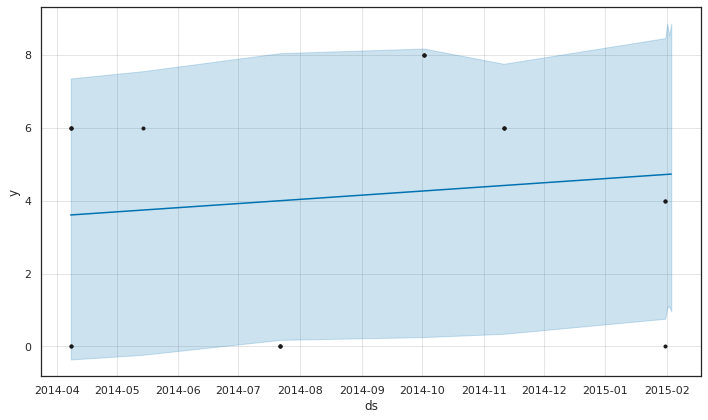

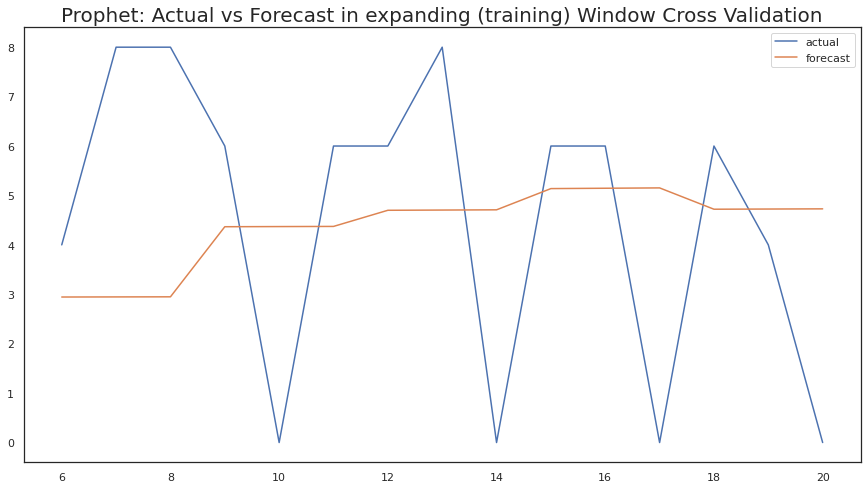

<Figure size 1080x576 with 0 Axes>

In [29]:
model.fit(traindata= train_df, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

In [30]:
future_predictions = model.predict(testdata=6)


Predicting using forecast period=6 as input for Prophet model
Building Forecast dataframe. Forecast Period = 6


In [31]:
test_df.reset_index(inplace=True)


In [32]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values


In [33]:
test_df.head()


,READING_START_DATE,GROSS_CONSUMPTION,Prophet Predictions
0,2014-07-22,0,4.461111
1,2015-01-31,0,4.463952
2,2015-01-31,0,4.466793
3,2014-04-08,0,4.469634
4,2014-05-14,6,4.472475


# model 2

In [34]:
model2 =auto_timeseries(forecast_period=100,
                        score_type='rmse', time_interval='Q',seasonality=True,
                        model_type='ARIMA')

In [35]:
model2.fit(traindata= train_df, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    READING_START_DATE column exists in given train data...
    train data shape = (21, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -3.7832958648553787      |
|           p-value           |     0.003082919208502574     |
|          #Lags Used         |             0.0              |
| Number of 

In [36]:
future_predictions = model.predict(testdata=6)
test_df["Prophet Predictions"] = future_predictions["yhat"].values
test_df.head()


Predicting using forecast period=6 as input for Prophet model
Building Forecast dataframe. Forecast Period = 6


,READING_START_DATE,GROSS_CONSUMPTION,Prophet Predictions
0,2014-07-22,0,4.461111
1,2015-01-31,0,4.463952
2,2015-01-31,0,4.466793
3,2014-04-08,0,4.469634
4,2014-05-14,6,4.472475


# data of all meters (date vs total gross consumption)

In [37]:
tot_df = df.groupby('READING_START_DATE')['GROSS_CONSUMPTION'].sum()
tot_df

READING_START_DATE
1994-04-27        0
2002-11-11     1539
2003-08-07     1482
2005-11-22     2154
2006-04-20      667
              ...  
2015-12-01    80468
2015-12-02     1331
2015-12-03      154
2015-12-05       -6
2015-12-06       -6
Name: GROSS_CONSUMPTION, Length: 966, dtype: int64

In [38]:
tot_df=tot_df.to_frame()

In [39]:
train2, test2 = train_test_split(tot_df, test_size=0.2)
print(len(train2))
print(len(test2))

772
194


In [40]:
model3 =auto_timeseries(forecast_period=100,score_type='rmse', time_interval='D',model_type='best')

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Star

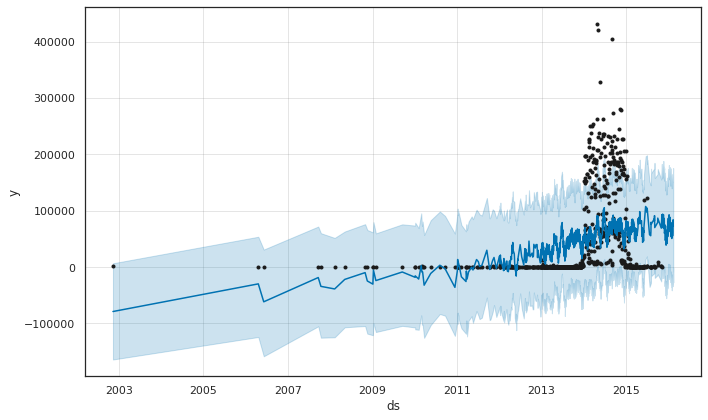

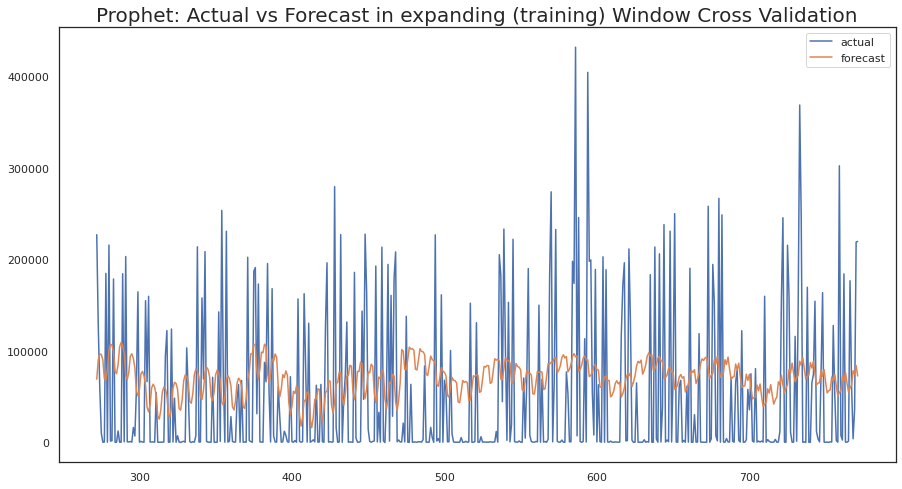

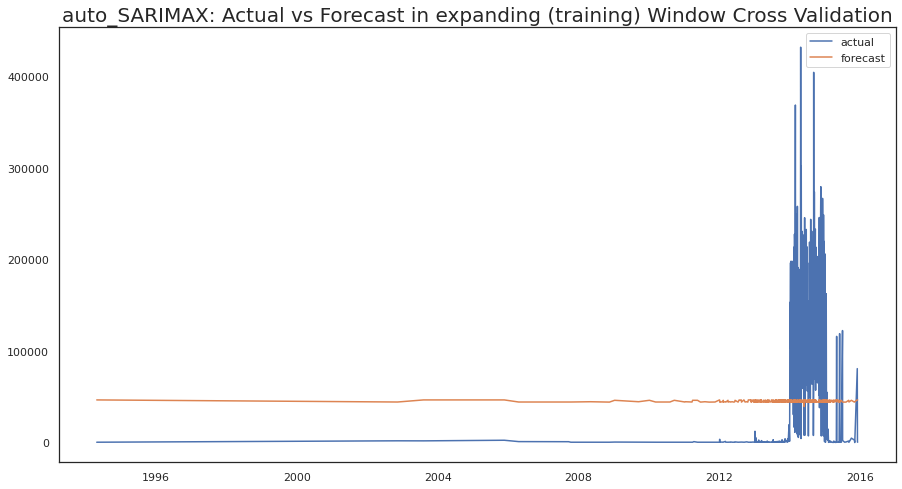

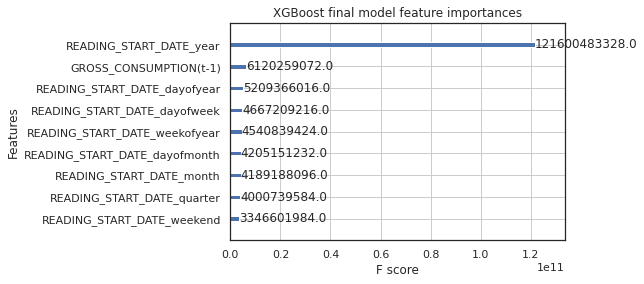

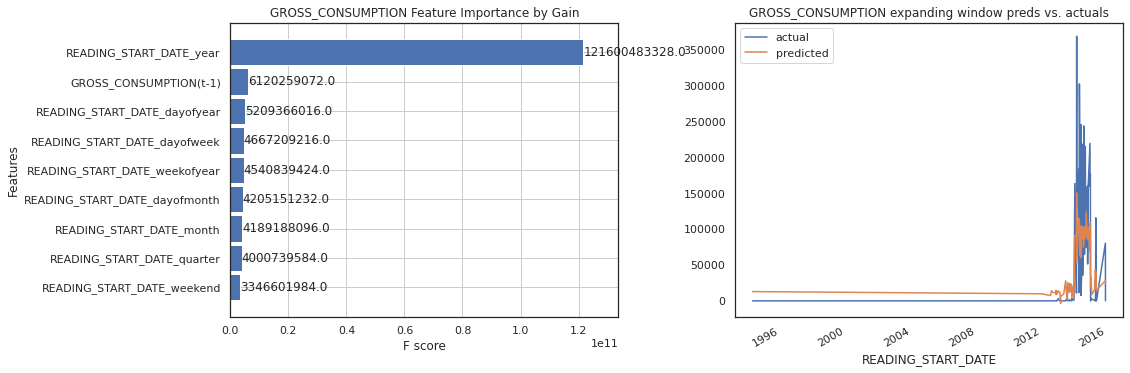

In [41]:
model3.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

In [43]:
future_predictions3 = model3.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions3["yhat"].values()


Predicting using forecast period=61 as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
(Error) Testdata must be pandas dataframe for ML model. No predictions will be made.


TypeError: 'NoneType' object is not subscriptable

# model 4  

In [44]:
model4 =auto_timeseries(score_type='rmse',model_type='best')
model4.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")
future_predictions4 = model4.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions4["yhat"].values()


Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 1365
It is an Annual time series.


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No seasonali

UnboundLocalError: local variable 'forecast_df_folds' referenced before assignment

54    0.00117223       80.9835      0.2968           1       99   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       940.068   0.000656993       64.0697       2.183      0.2183      101   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       940.076    0.00296105       90.8746           1           1      102   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       940.089    0.00048733       76.1522      0.5055      0.5055      103   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       940.123    0.00201231       57.6971           1           1      104   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       940.126    0.00114669        74.163      0.2073           1      106   
    Iter      log prob        ||dx||  

# forecasting daily average consumption


In [45]:
train5, test5 = train_test_split(tot_df, test_size=0.2)
print(len(train5))
print(len(test5))

772
194


In [46]:
model5 =auto_timeseries(score_type='rmse',model_type='best')
model5.fit(traindata= train5, 
          ts_column="READING_START_DATE",
          target="DAILY_AVERAGE_CONSUMPTION")
future_predictions5 = model5.predict(testdata=61)
test5["Prophet Predictions"] = future_predictions5["yhat"].values()

Start of Fit.....
    Target variable given as = DAILY_AVERAGE_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['DAILY_AVERAGE_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 478
It is an Annual time series.


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
   

UnboundLocalError: local variable 'forecast_df_folds' referenced before assignment

  1000.04     0.0360817       171.649      0.7152      0.7152       11   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       1004.35     0.0475491       162.778           1           1       12   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       8       1008.73      0.159974       254.162           1           1       13   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       9       1010.41     0.0211501       126.313      0.3817      0.7402       15   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      10       1010.98     0.0124168         121.3      0.3861      0.3861       16   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      11       1011.86     0.0272596       177.922      0.3062           1       18   
    Iter      log prob        |

# training on more recent time interval

In [47]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,2014-06-27,2014-08-09,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,2014-06-12,2015-09-03,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,2014-11-02,2014-04-29,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,2014-09-08,2014-10-11,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,2014-01-25,2014-04-24,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477313 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   POSTAL_TOWN                object        
 1   POSTCODE_OUTCODE           object        
 2   PROPERTY_CLASS             object        
 3   METER_KEY                  int64         
 4   READING_START_DATE         datetime64[ns]
 5   READING_END_DATE           datetime64[ns]
 6   READING_START_READING      float64       
 7   READING_END_READING        float64       
 8   GROSS_CONSUMPTION          int64         
 9   DAILY_AVERAGE_CONSUMPTION  float64       
 10  READING_SOURCE             object        
 11  CUSTOMER_TYPE              object        
 12  BILLPAYER_AGE              object        
 13  CURRENT_OCCUPANCY_AGE      float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 283.5+ MB


In [49]:
import datetime


In [50]:
df6= df[df["READING_START_DATE"]> np.datetime64('2013-06-06') ].groupby('READING_START_DATE')['GROSS_CONSUMPTION'].sum()
df6=df6.to_frame()

In [51]:
df6.head()

,GROSS_CONSUMPTION
READING_START_DATE,
2013-06-07,35
2013-06-08,18
2013-06-09,339
2013-06-10,34
2013-06-11,801


In [52]:
train6, test6 = train_test_split(df6, test_size=0.2)


In [53]:
model6 =auto_timeseries(score_type='rmse',model_type='best')
model6.fit(traindata= train6, 
          ts_column="READING_START_DATE",
          target="DAILY_AVERAGE_CONSUMPTION")


Start of Fit.....
    Target variable given as = DAILY_AVERAGE_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['DAILY_AVERAGE_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (560, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 4
Time Series time delta is unknown


In [54]:
future_predictions6 = model6.predict(testdata=61)
test6["Prophet Predictions"] = future_predictions6["yhat"].value()
test6

ValueError: min() arg is an empty sequence

# influence of property class and location on daily consumption

In [19]:
data.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,Leeds,NaN,1,1012229,2014-06-27,2014-08-09,339.0,345.0,6,0.081,1,0,25,5.0
1,Leeds,NaN,1,1012229,2014-06-12,2015-09-03,360.0,386.0,26,0.277,1,0,25,0.0
2,Leeds,,1,755928,2014-11-02,2014-04-29,2678.0,2716.0,38,0.487,1,0,25,8.0
3,Leeds,,1,755928,2014-09-08,2014-10-11,2768.0,2845.0,77,0.819,1,0,25,8.0
4,Leeds,,4,882360,2014-01-25,2014-04-24,98.0,102.0,4,0.044,1,0,85,7.0


# one-hot encoding of postal town data

In [111]:
len(datab["POSTAL_TOWN"].unique())

68

In [28]:
datac=data

In [114]:
datac["POSTAL_TOWN"].unique()

array(['Leeds', 'Barnoldswick', 'Bradford', 'Bingley', 'Shipley',
       'Cleckheaton', 'Keighley', 'Skipton', 'Settle', 'Richmond',
       'Darlington', 'Northallerton', 'Bedale', 'Catterick Garrison',
       'Doncaster', 'Goole', 'Scunthorpe', 'Huddersfield', 'Harrogate',
       'Ripon', 'Knaresborough', 'Hull', 'Hessle', 'North Ferriby',
       'Brough', 'Cottingham', 'Beverley', 'Hornsea', 'Withernsea',
       'Halifax', 'Elland', 'Sowerby Bridge', 'Hebden Bridge',
       'Lancaster', 'Carnforth', 'Otley', 'Wetherby', 'Tadcaster',
       'Pudsey', 'Ilkley', 'Todmorden', 'Sheffield', 'Rotherham',
       'Mexborough', 'Barnsley', 'Worksop', 'Saltburn-By-The-Sea',
       'Wakefield', 'Castleford', 'Knottingley', 'Dewsbury', 'Mirfield',
       'Liversedge', 'Heckmondwike', 'Batley', 'Ossett', 'Normanton',
       'Pontefract', 'York', 'Scarborough', 'Filey', 'Bridlington',
       'Malton', 'Pickering', 'Whitby', 'Driffield', 'Thirsk', 'Selby'],
      dtype=object)

In [29]:
dic={i:j for i,j in zip(datac["POSTAL_TOWN"].unique(),range(68)) }

In [30]:
no = {"POSTAL_TOWN":dic }
datac = datac.replace(no)

In [121]:
datac["POSTAL_TOWN"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [159]:
datac.describe()

,POSTAL_TOWN,PROPERTY_CLASS,METER_KEY,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
count,2.477313e+06,2.477313e+06,2.477313e+06,2.477310e+06,2.477303e+06,2.477313e+06,2.477313e+06,2.477313e+06,2.477313e+06,2.275409e+06
mean,2.785445e+01,3.304127e+00,6.780523e+05,4.499357e+02,4.687310e+02,1.847741e+01,2.313684e-01,6.970052e-03,4.642031e+01,5.776560e+00
std,2.082953e+01,2.238420e+00,3.718329e+05,6.533066e+02,6.830032e+02,9.145136e+01,4.716222e+00,1.118399e-01,2.016432e+01,5.890894e+00
min,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,-4.402000e+03,-3.570000e+02,0.000000e+00,2.500000e+01,0.000000e+00
25%,1.100000e+01,1.000000e+00,3.575910e+05,9.500000e+01,1.100000e+02,7.000000e+00,8.800000e-02,0.000000e+00,2.500000e+01,1.000000e+00
50%,2.200000e+01,3.000000e+00,7.080670e+05,2.700000e+02,2.890000e+02,1.500000e+01,1.840000e-01,0.000000e+00,4.500000e+01,3.000000e+00
75%,4.400000e+01,6.000000e+00,1.003931e+06,6.100000e+02,6.310000e+02,2.500000e+01,3.030000e-01,0.000000e+00,6.500000e+01,9.000000e+00
max,6.700000e+01,7.000000e+00,1.280076e+06,1.914380e+05,1.929020e+05,9.998200e+04,7.158769e+03,3.000000e+00,8.500000e+01,9.000000e+01


# model

In [26]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(datac[["POSTAL_TOWN","PROPERTY_CLASS"]]
,datac["GROSS_CONSUMPTION"], test_size = 0.2, random_state = 100)

In [161]:
regr = linear_model.LinearRegression()
regr.fit(x_train8, y_train8)

LinearRegression()

In [162]:
y_pred = regr.predict(x_test8)
print(y_test8)

85790       7
261081     39
1478296     4
417957     18
284670     15
           ..
801294     38
396567      2
2161850    12
826746     23
1358251     0
Name: GROSS_CONSUMPTION, Length: 495463, dtype: int64


In [163]:
print(len(x_test8))
print(len(y_test8))

495463
495463


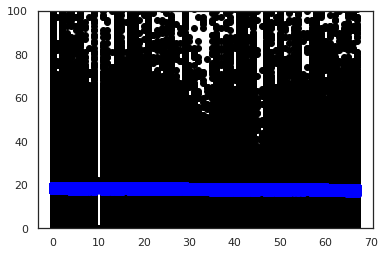

In [166]:
plt.ylim(0,100)
plt.scatter(x_test8["POSTAL_TOWN"],y_test8, color="black")
plt.scatter(x_test8["POSTAL_TOWN"], y_pred, color="blue", linewidth=3)

# random forest model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)
regr.fit(x_train8,y_train8)

RandomForestRegressor(max_depth=2, random_state=0)

In [39]:
Y_pred9 = regr.predict(x_test8)

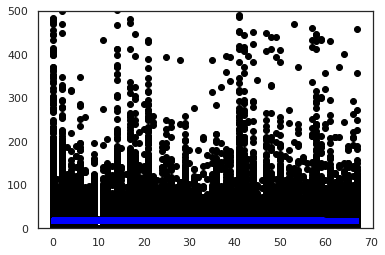

In [44]:
plt.ylim(0,500)
plt.scatter(x_test8["POSTAL_TOWN"],y_test8, color="black")
plt.plot(x_test8["POSTAL_TOWN"], Y_pred9, color="blue", linewidth=3)